<a href="https://www.kaggle.com/code/mikedelong/we-plot-some-lines-and-look-at-them?scriptVersionId=139119827" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df = pd.read_csv(filepath_or_buffer='../input/coffee-price-historical-data-analysis/bquxjob_655edff4_189cb70205c.csv')
df.head()

,year,Max_month,Max_price,Min_month,Min_Price
0,1973,10,138506,8,65484
1,1974,5,160816,11,108533
2,1975,10,178113,2,96223
3,1976,12,433281,2,178899
4,1977,3,690677,10,322515


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='year', ylabel='Max_price'>

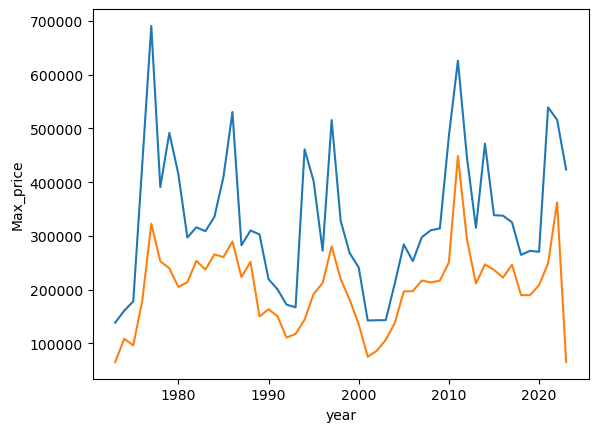

In [2]:
from seaborn import lineplot
lineplot(data=df, x='year', y='Max_price')
lineplot(data=df, x='year', y='Min_Price')

There's not much to see here; is the spread interesting?

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


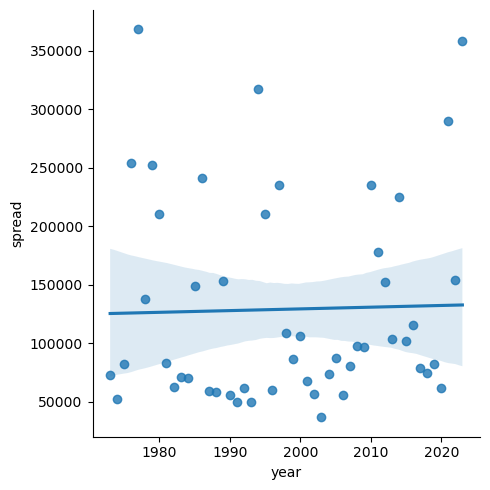

In [3]:
from seaborn import lmplot
df['spread'] = df['Max_price'] - df['Min_Price']
lmplot(data=df, x='year', y='spread')

It looks like there's a lot of volatility, and most of it is driven by a few volatile years, as most years the spread is below the linear model, which itself is very close to the mean. Is there any obvious seasonality to the min/max months?

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


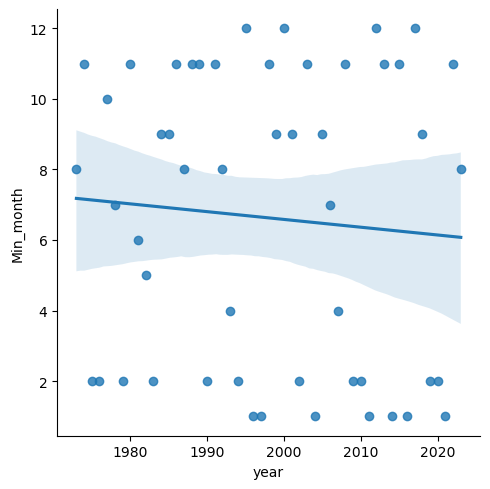

In [4]:
lmplot(data=df, x='year', y='Min_month')

Well, no. The minimum price month is either February or November, but good luck guessing which.

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


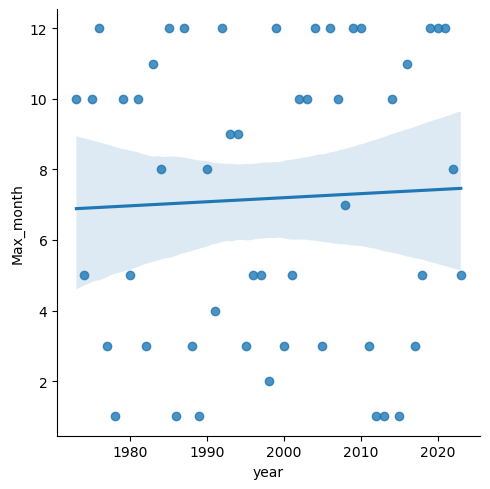

In [5]:
lmplot(data=df, x='year', y='Max_month')

Similarly the max price month. Pity the poor coffee trader if he doesn't have lots of additional information.

<Axes: xlabel='Min_month', ylabel='Max_month'>

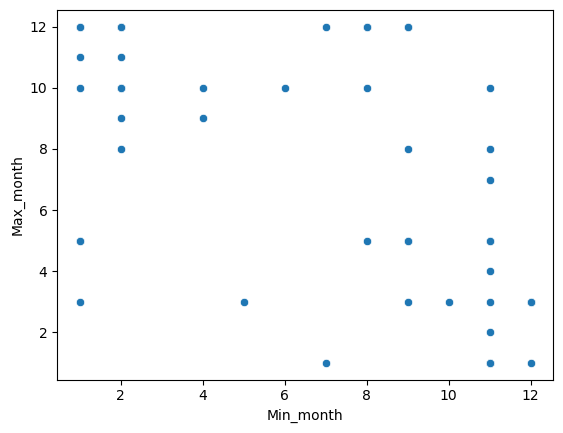

In [6]:
from seaborn import scatterplot
scatterplot(data=df, x='Min_month', y='Max_month')

It's silly to expect the max price month to be a function of the minimum price month.